In [1]:
%matplotlib inline

In [9]:
import matplotlib.pyplot
import skimage.io
import sklearn.pipeline

import skopy.preprocessing.image

In [12]:
nucleus = skimage.io.imread("../images/1.tif")

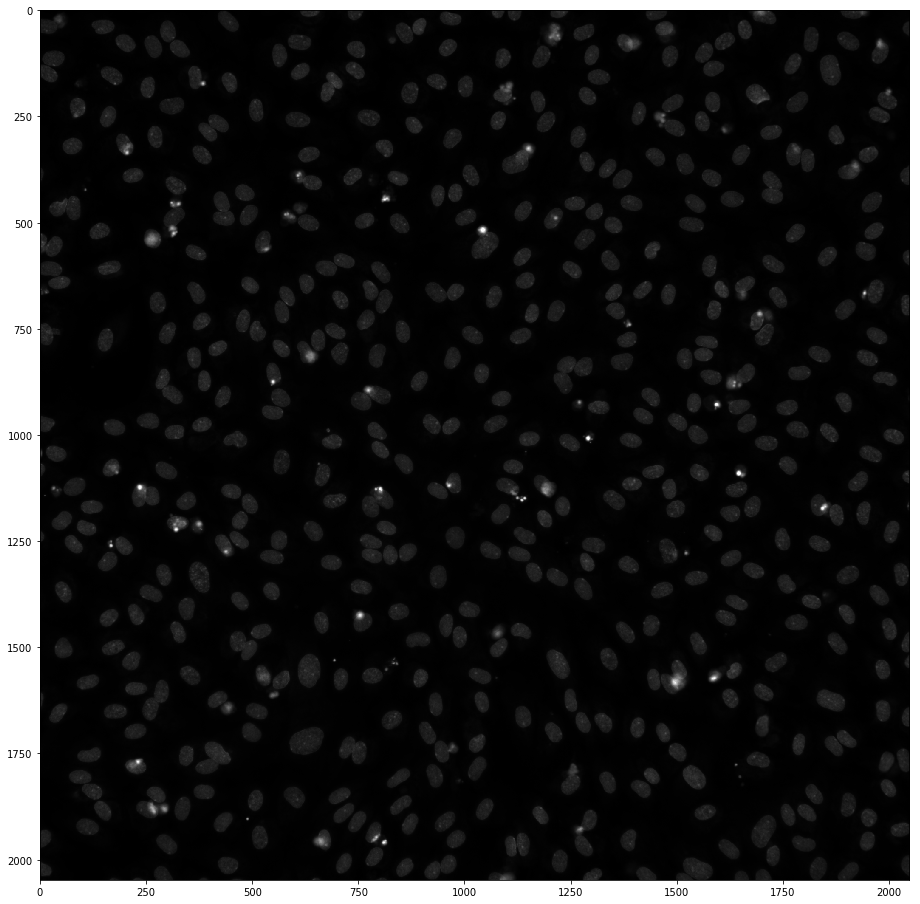

In [13]:
_ = matplotlib.pyplot.figure(figsize=(16, 16))

matplotlib.pyplot.imshow(image, cmap="gray")

In [14]:
%time primary_objects = skopy.preprocessing.image.identify_primary_objects(nucleus, footprint=(16, 16), sigma=1)

CPU times: user 10.1 s, sys: 199 ms, total: 10.3 s
Wall time: 10.3 s


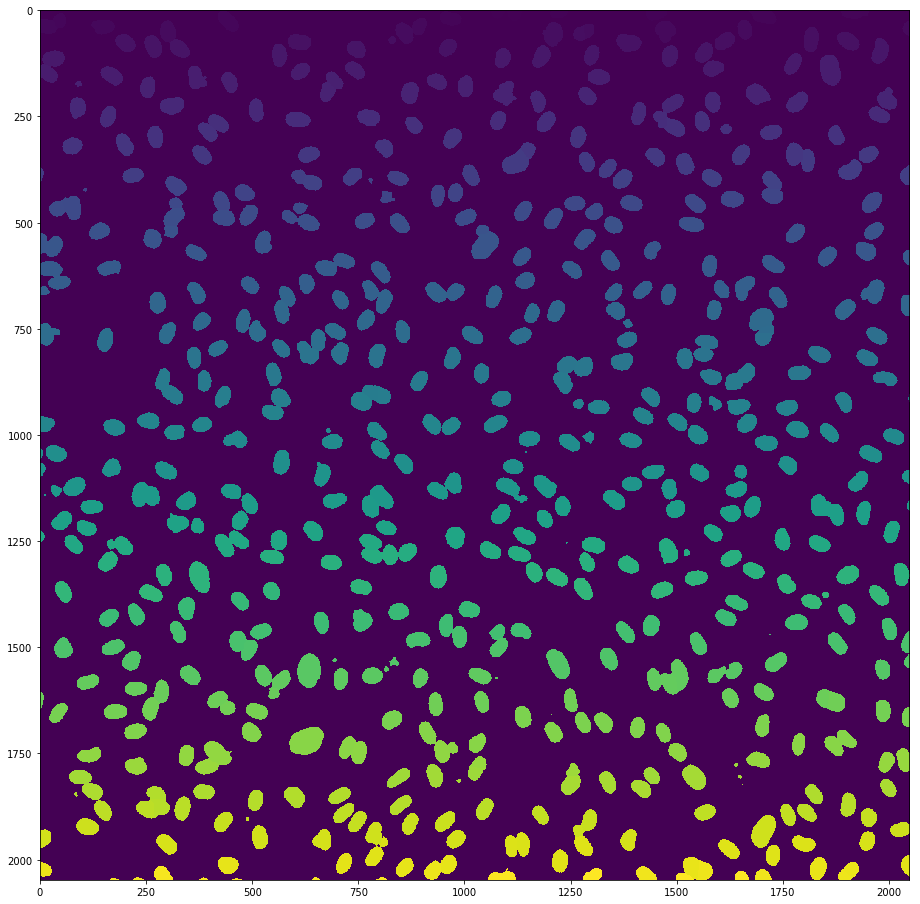

In [8]:
_ = matplotlib.pyplot.figure(figsize=(16, 16))

matplotlib.pyplot.imshow(primary_objects)

In [15]:
membrane = skimage.io.imread("../images/3.tif")

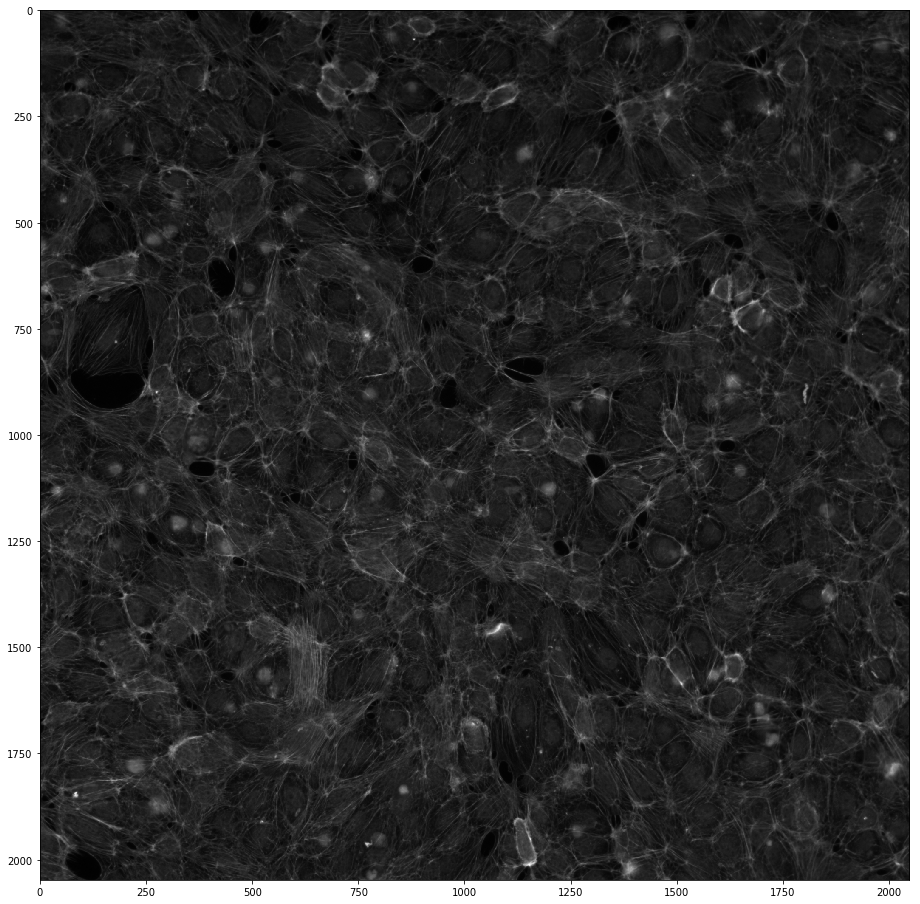

In [16]:
_ = matplotlib.pyplot.figure(figsize=(16, 16))

matplotlib.pyplot.imshow(membrane, cmap="gray")

In [23]:
%time secondary_objects = skopy.preprocessing.image.identify_secondary_objects(membrane, primary_objects, sigma=1)

CPU times: user 2.48 s, sys: 160 ms, total: 2.64 s
Wall time: 2.64 s


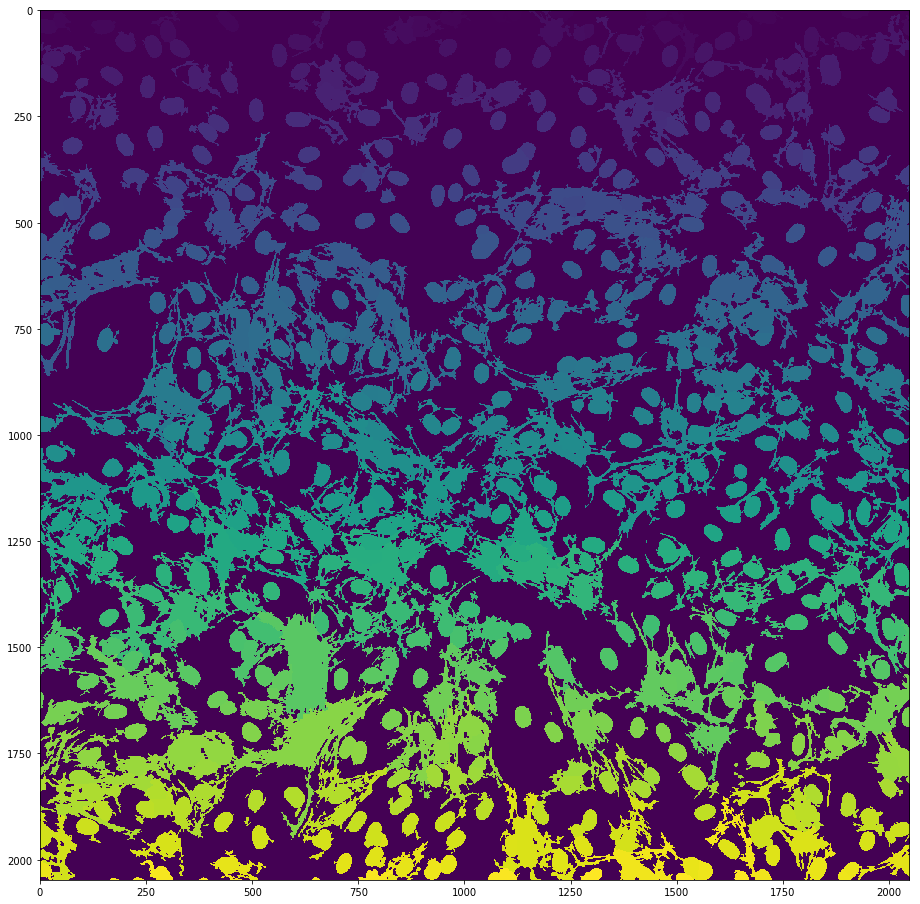

In [24]:
_ = matplotlib.pyplot.figure(figsize=(16, 16))

matplotlib.pyplot.imshow(secondary_objects)

In [25]:
import numpy
import skimage.measure


feature_names = [
    "integrated",
    "maximum",
    "mean",
    "median",
    "median_absolute_deviation",
    "minimum",
    "quartile_1",
    "quartile_2",
    "quartile_3",
    "standard_deviation"
]


def extract_object_intensity_features(image, mask):
    properties = skimage.measure.regionprops(mask, image)

    intensity_features = numpy.zeros((len(properties), len(feature_names)))

    for index, properties in enumerate(properties):
        features = [
            numpy.sum(properties.intensity_image),
            numpy.max(properties.intensity_image),
            numpy.mean(properties.intensity_image),
            numpy.median(properties.intensity_image),
            numpy.median(numpy.abs(numpy.ma.array(properties.intensity_image).compressed() - numpy.median(properties.intensity_image))),
            numpy.min(properties.intensity_image),
            numpy.percentile(properties.intensity_image, 25),
            numpy.percentile(properties.intensity_image, 50),
            numpy.percentile(properties.intensity_image, 75),
            numpy.std(properties.intensity_image)
        ]

        intensity_features[index] = features

    return intensity_features

In [28]:
extract_object_intensity_features(image, primary_objects).shape

(591, 10)